<a href="https://colab.research.google.com/github/PrinceChauhanhub/Machine_Learning/blob/main/K_Means_Clustering_on_E_Commerce_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing K-Means

Importing all the required Modules

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Records of given dataset

In [169]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Bootcamp/Unsupervised learning/data.csv',delimiter = ",", encoding = "ISO-8859-1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


delimiter is used bcs in the file ',' is the seperated one and encoding is used to help us to read the textual data.

In [170]:
data.shape

(541909, 8)

There are 541909 data entries present

# Data Understanding

Information of entire columns

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


some null values present.

**Description of numerical features**

In [172]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


by default the describe method gives the description of numeric features

**Description of Non NUmerical features**

In [173]:
data.describe(exclude=['int64','float64']).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


Check for NULL Values

In [174]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Null values present in Description and CustomerId feature

In [175]:
data.shape

(541909, 8)

Deleting all the missing records

In [176]:
data.dropna(inplace=True)

In [177]:
data.shape

(406829, 8)

In [178]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


we just drop the null values but there can be another way to handle null values like data imputation.

**Checking if there negative value present in Quantity and Unit Price**

In [179]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


the negative value indicates the cancelled order.
By data analysis persue the cancelled order is important so that company know whats wrong with their order so that they can improves their product and earn more profit and reduce the cancel order.

but here we are not doing the analysis so we can just drop the -ve quantities.

In [180]:
data[data['UnitPrice']<0].shape[0]

0

**Drop the negative values or quantity**

In [181]:
data.drop(data[data['Quantity']<0].index,inplace=True)

In [182]:
data.shape

(397924, 8)

# **Data Prepration**

Calculation of total amount or monetary value

In [183]:
data['Sales'] = data['Quantity']*data['UnitPrice']
new_data = data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


for every customer the sum if the sales value/ it shows spending power of each and every customer.

In [184]:
type(new_data)

pandas.core.frame.DataFrame

Calculating the number of transactions of each customer

In [185]:
num_trans = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [186]:
type(num_trans)

pandas.core.frame.DataFrame

Now we have 2 new dataframes:

new_data -> it shows the sales of every customer</br>
num_trans -> it shows the spending value of each customers

**Calculate Last transaction time**

converting timestamp type to date-time type

In [187]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [188]:
data['Last Transaction'] = (data['InvoiceDate'].max()-data['InvoiceDate']).dt.days

In [189]:
data['Last Transaction']

,Last Transaction
0,373
1,373
2,373
3,373
4,373
...,...
541904,0
541905,0
541906,0
541907,0


In [190]:
data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,373
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,373
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,373


In [191]:
lt = data.groupby(['CustomerID','Country'])['Last Transaction'].max().reset_index()

In [192]:
lt

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


Merging the tables using inner join

In [193]:
merge_table = pd.merge(lt, num_trans, how='inner', on='CustomerID')
new_df = pd.merge(merge_table, new_data, how='inner', on='CustomerID')
new_df

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


# EDA (Exploratory Data Analysis)

**Outlier detection**

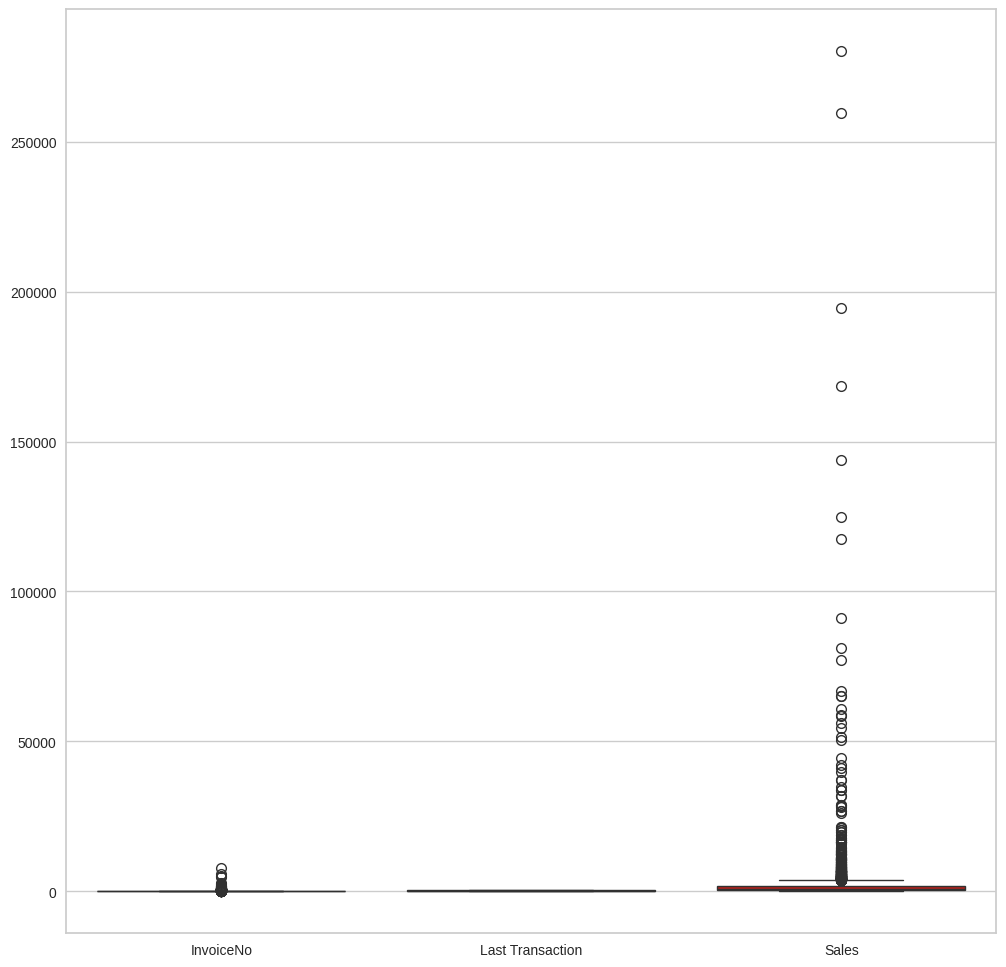

In [194]:
plt.figure(figsize=(12,12))
sns.boxplot(data = new_df[['InvoiceNo', 'Last Transaction', 'Sales']] )
plt.show()

Applying IQR to remove the Outliers

In [195]:
Q3 = new_df['Sales'].quantile(0.75)
Q1 = new_df['Sales'].quantile(0.25)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

new_df_iqr = new_df[(new_df['Sales'] < upper_limit) & (new_df['Sales'] > lower_limit)]
new_df_iqr.shape


(3923, 5)

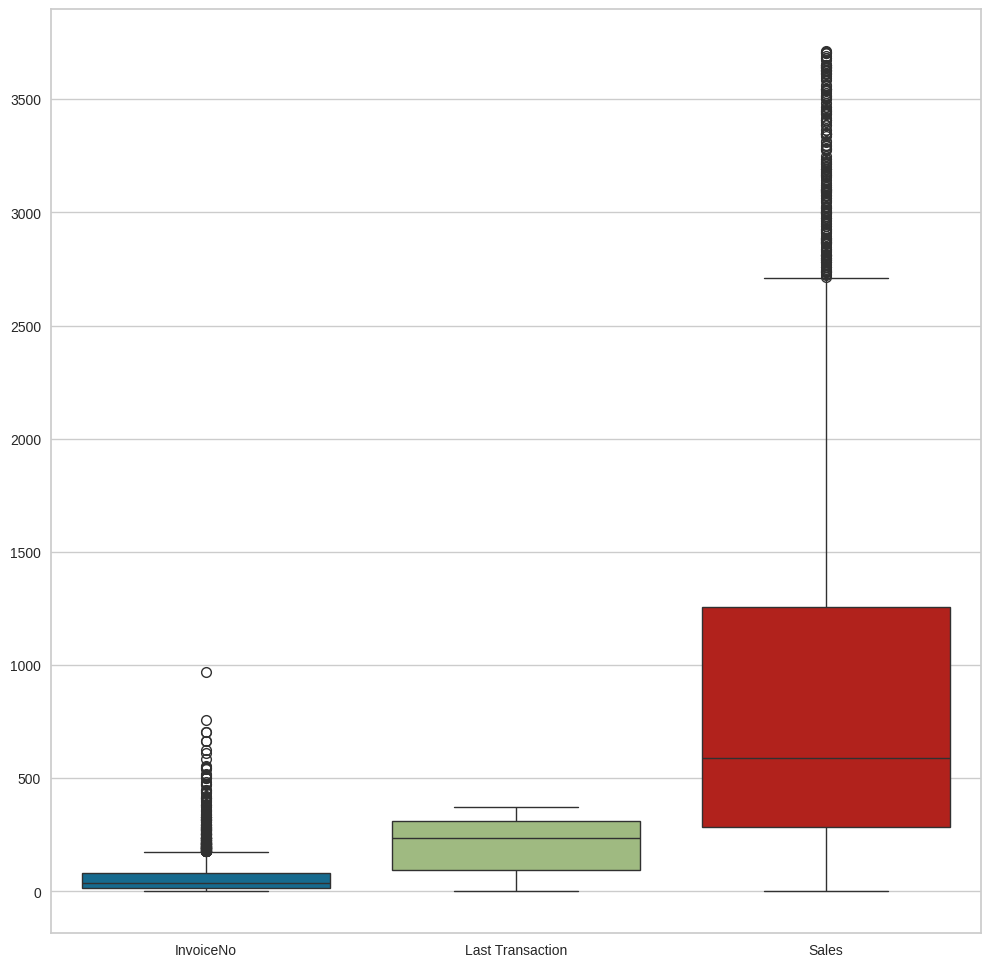

In [196]:
plt.figure(figsize=(12,12))
sns.boxplot(data = new_df_iqr[['InvoiceNo', 'Last Transaction', 'Sales']] )
plt.show()

In [197]:
new_df_iqr.reset_index(drop = True, inplace = True)
new_df_iqr

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280.0,United Kingdom,277,10,180.60
3919,18281.0,United Kingdom,180,7,80.82
3920,18282.0,United Kingdom,125,12,178.05
3921,18283.0,United Kingdom,336,756,2094.88


Visualization of corelation matrix using heatmap

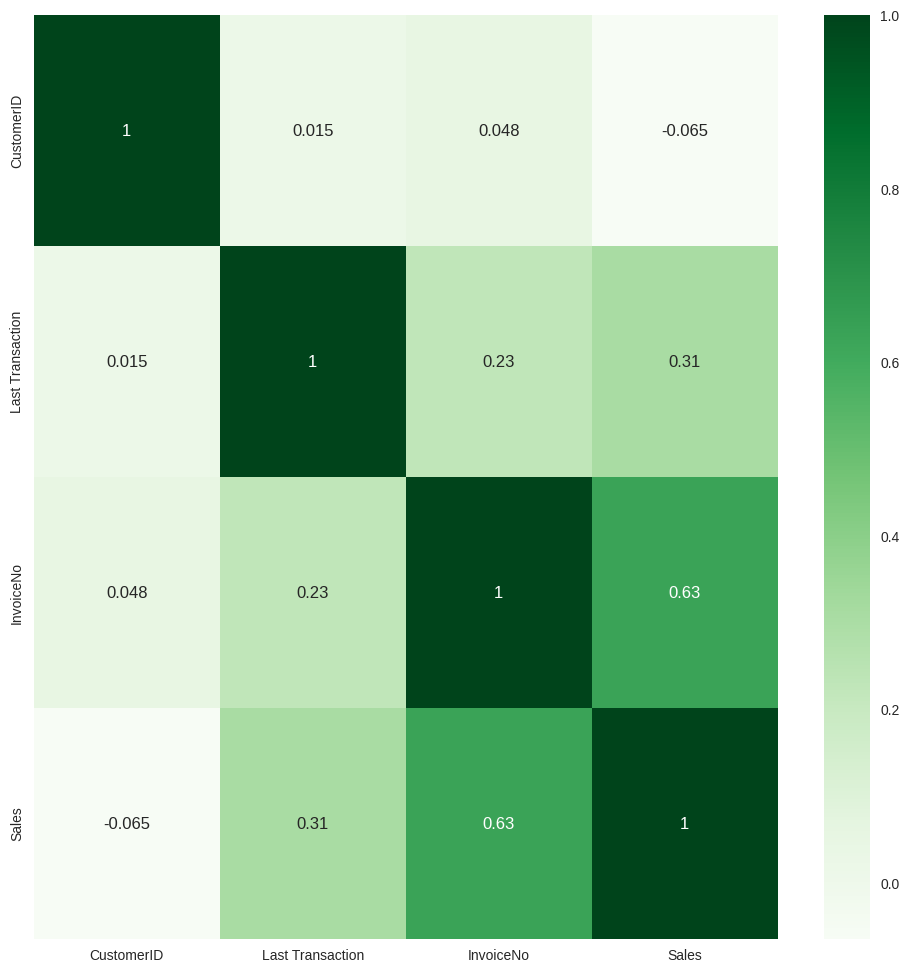

In [198]:
numeric_df = new_df_iqr.select_dtypes(include=[np.number])
plt.figure(figsize=(12,12))
sns.heatmap(numeric_df.corr(),cmap="Greens", annot=True)
plt.show()

**Normalization of given dataset using MinMaxScalar**

In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [200]:
new2_df = new_df_iqr[['Last Transaction', 'InvoiceNo', 'Sales']]
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['Last Transaction', 'InvoiceNo', 'Sales']
scaled_df['country'] = new_df_iqr['Country']
scaled_df

,Last Transaction,InvoiceNo,Sales,country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


# K-Means Clustering

**plot the graph using elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

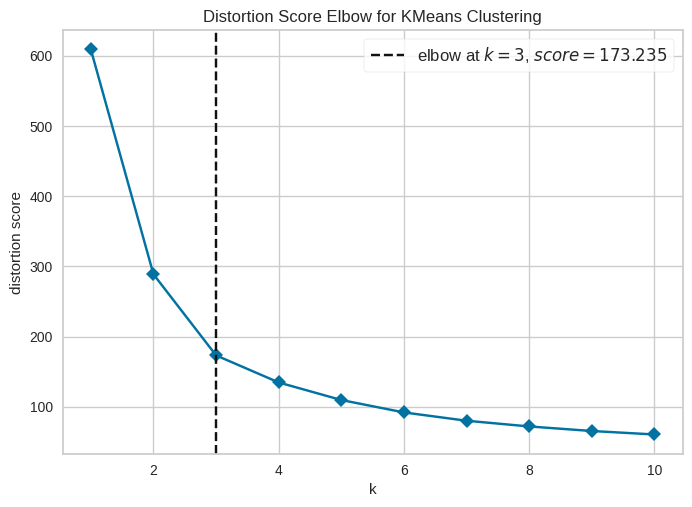

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [201]:
df_k = scaled_df.drop(columns=['country'],axis=1)  #dropping country value
# Elbow method for K means
#Import ElbowVisualizer

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

# k is range of number of clusters
visualizer = KElbowVisualizer(model, k=(1,11),timings = False)
visualizer.fit(df_k)          # Fit data to visualizer
visualizer.show()



we get value of **k = 3**

In [202]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_k)
df_k['clusters'] = y_predicted
df_k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Last Transaction,InvoiceNo,Sales,clusters
0,0.957105,0.030960,0.484200,2
1,0.048257,0.074303,0.473507,1
2,0.828418,0.016512,0.090092,0
3,0.793566,0.086687,0.675160,2
4,0.544236,0.003096,0.023978,0
...,...,...,...,...
3918,0.742627,0.009288,0.048656,0
3919,0.482574,0.006192,0.021774,1
3920,0.335121,0.011352,0.047969,1
3921,0.900804,0.779154,0.564388,2


Now we have Target Clusters Available

In [203]:
km.cluster_centers_

array([[0.77665026, 0.04271404, 0.15749496],
       [0.22076895, 0.04001774, 0.14851301],
       [0.79796367, 0.15825709, 0.63324065]])

# Model Evaluation

In [204]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print('Silhouette Score:' , score)

Silhouette Score: 0.7825091729783356


Silhouette Score = 0.78 it means value of K is good

# **Hierarchical clustering**

In [205]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=2)
y_predict_hierarchical = hierarchical.fit_predict(df_k)
df_k['clusters_hierarchical'] = y_predict_hierarchical
df_k

,Last Transaction,InvoiceNo,Sales,clusters,clusters_hierarchical
0,0.957105,0.030960,0.484200,2,0
1,0.048257,0.074303,0.473507,1,0
2,0.828418,0.016512,0.090092,0,1
3,0.793566,0.086687,0.675160,2,0
4,0.544236,0.003096,0.023978,0,1
...,...,...,...,...,...
3918,0.742627,0.009288,0.048656,0,1
3919,0.482574,0.006192,0.021774,1,0
3920,0.335121,0.011352,0.047969,1,0
3921,0.900804,0.779154,0.564388,2,0


Model Evaluation of Hierachical Clustering

In [206]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_agglumerative = silhouette_score(df_k, km.labels_, metric='euclidean')
print('Silhouette Score:' , score_agglumerative)

Silhouette Score: 0.8110674829952721


# DBSCAN Clustering

In [207]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=4)
y_predict_dbscan = dbscan.fit_predict(df_k)
df_k['clusters_dbscan'] = y_predict_dbscan
df_k


,Last Transaction,InvoiceNo,Sales,clusters,clusters_hierarchical,clusters_dbscan
0,0.957105,0.030960,0.484200,2,0,0
1,0.048257,0.074303,0.473507,1,0,1
2,0.828418,0.016512,0.090092,0,1,2
3,0.793566,0.086687,0.675160,2,0,0
4,0.544236,0.003096,0.023978,0,1,2
...,...,...,...,...,...,...
3918,0.742627,0.009288,0.048656,0,1,2
3919,0.482574,0.006192,0.021774,1,0,1
3920,0.335121,0.011352,0.047969,1,0,1
3921,0.900804,0.779154,0.564388,2,0,0


Model Evaluation of DBSCAN Clustering

In [208]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_dbscan = silhouette_score(df_k, km.labels_, metric='euclidean')
print('Silhouette Score:' , score_dbscan)

Silhouette Score: 0.8471425840046681
